In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("data.csv",encoding= 'unicode_escape')
data.shape

(541909, 8)

In [139]:
data.isna().sum() #1

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [140]:
data=data.dropna() # removing the nulls

In [4]:
#data[data.duplicated()] # We don't want to get rid of the duplicate rows here

In [5]:
#data.duplicated().sum()
#data=data.drop_duplicates()
#data.duplicated().sum()

In [143]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom


In [142]:
data.InvoiceDate=pd.to_datetime(data.InvoiceDate).dt.date


In [144]:
data.Country.value_counts(normalize=True)

United Kingdom          0.889509
Germany                 0.023339
France                  0.020871
EIRE                    0.018398
Spain                   0.006226
Netherlands             0.005828
Belgium                 0.005086
Switzerland             0.004614
Portugal                0.003638
Australia               0.003095
Norway                  0.002669
Italy                   0.001974
Channel Islands         0.001863
Finland                 0.001708
Cyprus                  0.001529
Sweden                  0.001136
Austria                 0.000986
Denmark                 0.000956
Japan                   0.000880
Poland                  0.000838
USA                     0.000715
Israel                  0.000615
Unspecified             0.000600
Singapore               0.000563
Iceland                 0.000447
Canada                  0.000371
Greece                  0.000359
Malta                   0.000312
United Arab Emirates    0.000167
European Community      0.000150
RSA       

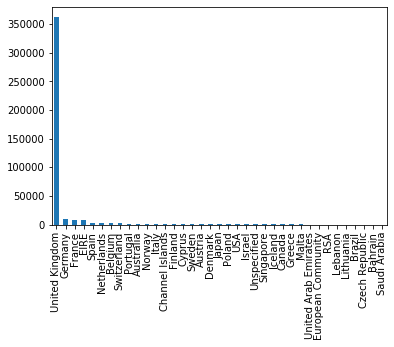

In [145]:
data.Country.value_counts().plot(kind="bar")

In [146]:
#Getting rid of cancelled invoices
# Removing the description of items that starts with a "*"
data=data[~data.InvoiceNo.str.startswith ("C") ]
data[data.Description.str.startswith("*")]
data=data[data.Quantity>=0]

In [147]:
data.shape

(397924, 8)

In [89]:
data["Country"]=data["Country"].apply(lambda x: "United Kingdom" if x=="United Kingdom" else "other")

In [90]:
data.Country.value_counts(normalize=True) # Changing the country names of the countries that are not UK to "other"

United Kingdom    0.890484
other             0.109516
Name: Country, dtype: float64

In [149]:
Freq=data.groupby("CustomerID")["InvoiceNo"].count().reset_index().rename(columns={"InvoiceNo":"Freq"})
Freq.head()  #How frequent are the customers purchasing the products

,CustomerID,Freq
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [150]:
# Number of days since the last purchase

max_date=data.InvoiceDate.max()

recency=(max_date-data.groupby("CustomerID")["InvoiceDate"].max().reset_index().InvoiceDate.rename(columns={"InvoiceDate":"Days"})).dt.days

In [151]:
recency.head()

0    325
1      2
2     75
3     18
4    310
dtype: int64

In [152]:
df=data.groupby("CustomerID")["InvoiceDate"].max().reset_index()
df=pd.concat([df,recency],axis=1)
df=df.rename(columns={0:"Days"})
df=df.drop("InvoiceDate",axis=1)
Recency=df.copy()
Recency.head()

,CustomerID,Days
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


In [153]:
data["Amount"]=data.Quantity*data.UnitPrice

In [154]:
# Total amount of transactions for each customer

Monetary=data.groupby("CustomerID")["Amount"].sum().reset_index()

In [155]:
Monetary.head()

,CustomerID,Amount
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [156]:
# Creating a dataset with the most important features to evaluate the valued customers
retail=Monetary.merge(Freq,on="CustomerID",how="inner").merge(Recency,on="CustomerID",how="inner")


In [159]:
retail.head()
retail.isna().sum()
retail.head()

,CustomerID,Amount,Freq,Days
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,2
2,12348.0,1797.24,31,75
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,310


Removing outliers from Amount, Freq, and Days in the retail table

In [167]:


Q1 = retail.Amount.quantile(0.25)
Q3 = retail.Amount.quantile(0.75)
IQR = Q3 - Q1
upper_bound=Q3 + 1.5*IQR
lower_bound=Q1 - 1.5*IQR

retail=retail[retail.Amount<=upper_bound]

In [168]:
retail.head()
    



,CustomerID,Amount,Freq,Days
2,12348.0,1797.24,31,75
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,310
5,12352.0,2506.04,85,36
6,12353.0,89.00,4,204


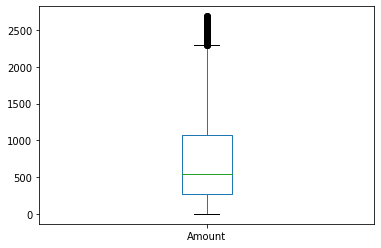

In [169]:
import matplotlib.pyplot as plt
retail.Amount.plot(kind="box")
plt.show()

In [170]:

Q3 = retail.Days.quantile(0.75)
IQR = Q3 - Q1
upper_bound=Q3 + 1.5*IQR
lower_bound=Q1 - 1.5*IQR


In [171]:
retail=retail[(retail.Days<=upper_bound)] # Want to keep the customers who purchase frequently


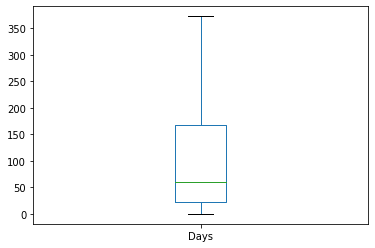

In [172]:
retail.Days.plot(kind="box")

In [173]:
retail.head()

,CustomerID,Amount,Freq,Days
2,12348.0,1797.24,31,75
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,310
5,12352.0,2506.04,85,36
6,12353.0,89.00,4,204


In [174]:
Q1 = retail.Freq.quantile(0.25)
Q3 = retail.Freq.quantile(0.75)
IQR = Q3 - Q1
upper_bound=Q3 + 1.5*IQR
lower_bound=Q1 - 1.5*IQR


In [175]:

retail=retail[retail.Freq<=upper_bound]

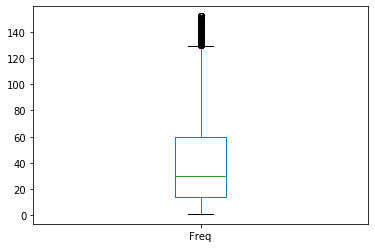

In [176]:
retail.Freq.plot(kind="box")

In [177]:
# Lets Standardize the data
from sklearn.preprocessing import StandardScaler



In [178]:
df_kmeans = retail.iloc[:,1:]

# scaling the variables and store it in different df
standard_scaler = StandardScaler()
df_kmeans_norm = standard_scaler.fit_transform(df_kmeans)



In [179]:
df_kmeans_norm 


array([[ 1.80447856, -0.29773993, -0.31067416],
       [ 1.73900805,  0.88048096, -0.85968816],
       [-0.60854448, -0.69048023,  1.95280463],
       ...,
       [-1.02683656, -0.97100901,  0.70066743],
       [-0.86645113, -0.83074462, -0.96563823],
       [ 1.87052641,  0.79632233, -0.62852437]])

In [180]:
# converting it into dataframe
df_kmeans_norm = pd.DataFrame(df_kmeans_norm)
df_kmeans_norm.columns = ['Monetary','Frequency',"Recency"]
df_kmeans_norm.head()

,Monetary,Frequency,Recency
0,1.804479,-0.297740,-0.310674
1,1.739008,0.880481,-0.859688
2,-0.608544,-0.690480,1.952805
3,2.973677,1.217116,-0.686315
4,-1.013343,-1.055168,0.931831


In [181]:
df_kmeans_norm.isna().sum()
df_kmeans_norm.shape

(3475, 3)

In [182]:
from sklearn.cluster import KMeans # Find the optimal number of clusters by analyzing the elbow plot

list_=[]
for n in range(1,10):
    algo=KMeans(n_clusters=n)
    algo.fit(df_kmeans_norm )
    list_.append(algo.inertia_)

    

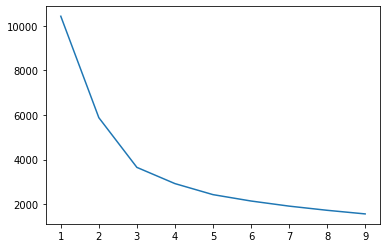

In [183]:
import matplotlib.pyplot as plt  # Let's take 3 clusters
plt.plot(range(1,10),list_)

In [184]:

algo=KMeans(n_clusters=3)
algo=algo.fit(df_kmeans_norm)
labels=algo.labels_
new=df_kmeans_norm.assign(cluster=labels)

In [185]:
new.head()
new.isna().sum()
new.shape

(3475, 4)

In [186]:
new.head()

,Monetary,Frequency,Recency,cluster
0,1.804479,-0.297740,-0.310674,1
1,1.739008,0.880481,-0.859688,1
2,-0.608544,-0.690480,1.952805,2
3,2.973677,1.217116,-0.686315,1
4,-1.013343,-1.055168,0.931831,2


In [187]:
retail.head()

,CustomerID,Amount,Freq,Days
2,12348.0,1797.24,31,75
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,310
5,12352.0,2506.04,85,36
6,12353.0,89.00,4,204


In [188]:
retail["cluster"]=new["cluster"] 
#retail.head()
retail.isna().sum()
retail.head()

,CustomerID,Amount,Freq,Days,cluster
2,12348.0,1797.24,31,75,2.0
3,12349.0,1757.55,73,18,1.0
4,12350.0,334.40,17,310,2.0
5,12352.0,2506.04,85,36,2.0
6,12353.0,89.00,4,204,2.0


In [189]:
retail.groupby("cluster")['Amount','Freq','Days'].mean().reset_index() 
# From this analysis we can conclude that the customers in cluster 1 made
#the most investments and can be considered as valued customers

,cluster,Amount,Freq,Days
0,0.0,726.266214,42.405896,107.579743
1,1.0,738.670873,41.782857,102.104286
2,2.0,683.070402,39.608812,110.216288
